# 결과

+ best1(mae : 1.89) : 각 변수 minmax scaling 한 ridge(alpha= 0.1)이 가장 성능이 좋았다
+ best2(mae : 1.90) : 각 변수 standard scaling한 ridge(alpha= 1) 이 2번째로 성능이 좋았다.

+ R에서 뽑은 변수들만 출력 :8개 + 10개  = 총 13개 (겹치는거 제외)
+ 13개 변수 이용
["crm_clue_자수","crm_clue_타인신고","crm_clue_현행범","crm_clue_탐문정보","vic_sx_2","기초수급_19세이하","기초수급_20_34세","crm_tm_새벽","화재_사망","cctv_개수","배치인원_수","비상벨_개수","일인가구수", "score_법질서"]

In [1]:
import pandas as pd

#그래프에 한글 표현하기
import  matplotlib.pyplot as plt
import  matplotlib.font_manager as fm
import  matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)



#마이너스 표시하기
import  matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]  = False

import numpy as np
import pandas  as pd
import seaborn as sns
##회귀분석
import statsmodels.api as sm
# 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import  RFE
from lightgbm import LGBMClassifier,  LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, SVC
import multiprocessing 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from scipy import stats
#사용법이 파이선과 다른 기존xgb를  파이선에 맞게 만들어 놓은 것
from  xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler

#변수영향도 그래프, 트리그래프 더 쉽게 그리게 해줌
from xgboost import plot_importance, plot_tree

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("../완성본_안전도_회귀분석/4_법질서안전도.csv")

In [3]:
# 변수8개 설명력 0.54
# score_법질서~+crm_clue_자수+crm_clue_현행범+crm_clue_탐문정보+vic_sx_2
#           +화재_사망+비상벨_개수+기초수급_19세이하
#           +기초수급_20_34세

In [4]:
# 변수 10개 설명력 0.59
# (score_법질서~+crm_clue_자수+crm_clue_타인신고+crm_clue_현행범
#           +crm_clue_탐문정보+crm_tm_새벽
#           +화재_사망+cctv_개수+배치인원_수+비상벨_개수+일인가구수,data=dt

In [5]:
# #R에서 뽑은 변수들만 출력 :8개
# df = df[["crm_clue_자수","crm_clue_현행범","crm_clue_탐문정보","vic_sx_2"
#     ,"화재_사망","비상벨_개수","기초수급_19세이하"
#          ,"기초수급_20_34세", "score_법질서"]]

In [6]:
# #R에서 뽑은 변수들만 출력 :10개
# df = df[["crm_clue_자수","crm_clue_타인신고","crm_clue_현행범","crm_clue_탐문정보",
#          "crm_tm_새벽","화재_사망","cctv_개수","배치인원_수","비상벨_개수","일인가구수", "score_법질서"]]

In [4]:
#R에서 뽑은 변수들만 출력 :13개
# crm_wthr_폭설, crm_clue_고발, crm_clue_불심검문, 총_인구수
df = df[["crm_clue_자수","crm_clue_타인신고","crm_clue_현행범","crm_clue_탐문정보","vic_sx_2","기초수급_19세이하","기초수급_20_34세",
         "crm_tm_새벽","화재_사망","cctv_개수","배치인원_수","비상벨_개수","일인가구수", "score_법질서"]]

In [102]:
df

,crm_clue_자수,crm_clue_타인신고,crm_clue_현행범,crm_clue_탐문정보,vic_sx_2,기초수급_19세이하,기초수급_20_34세,crm_tm_새벽,화재_사망,cctv_개수,배치인원_수,비상벨_개수,일인가구수,score_법질서
0,84.0,645.0,592.0,151.0,2037.0,39101,9131,809.0,2,4719,395,5.0,52811.0,67.60
1,40.0,338.0,409.0,71.0,1294.0,39101,9131,420.0,1,2919,258,1.0,28612.0,64.90
2,99.0,348.0,648.0,101.0,1852.0,39101,9131,473.0,0,4447,333,8.0,41116.0,66.10
3,13.0,146.0,203.0,80.0,735.0,54889,11055,165.0,2,1218,185,11.0,20165.0,64.65
4,39.0,185.0,95.0,70.0,605.0,54889,11055,122.0,0,913,142,12.0,21519.0,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,6.0,94.0,154.0,11.0,419.0,31361,11882,84.0,0,1855,176,499.0,24317.0,69.75
119,11.0,274.0,521.0,29.0,1076.0,46485,15246,350.0,1,4469,406,1778.0,52196.0,66.30
120,2.0,152.0,280.0,16.0,724.0,6833,2472,159.0,3,1563,236,339.0,18597.0,68.15
121,0.0,142.0,240.0,22.0,505.0,5756,2573,115.0,4,784,213,42.0,41063.0,66.40


<AxesSubplot:>

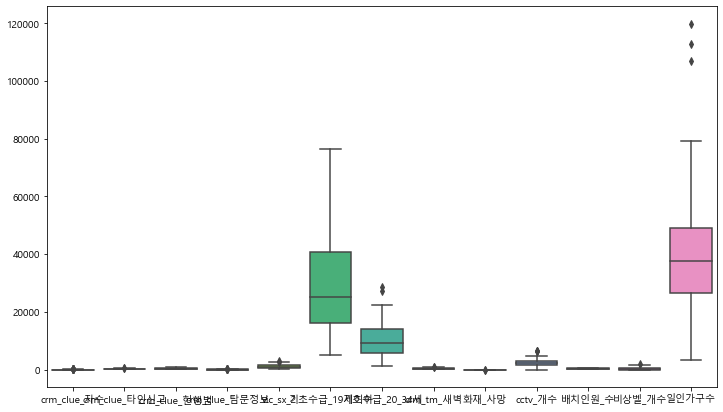

In [4]:
#이상치 확인
#극단값을  갖는  모습을 볼 수 있다 ->robustscale하면  좋을  듯  하다
plt.figure(figsize = (12,7))
sns.boxplot(data = df.iloc[:,:-1])

# 설명력 보기위한 모델링

In [8]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_법질서"],test_size = 0.3, random_state=0)

# ridge, lasso, elasticnet을 위한 alpha값 찾기 함수

In [5]:
def alphas_finder(model):
    alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
    for alpha in alphas:
        modeling = model(alpha=alpha)
        modeling.fit(X_train, y_train)
        print(alpha , ":" ,round(modeling.score(X_train, y_train),3)
              , round(modeling.score(X_test, y_test),3)
              ,"mae:",round(mean_absolute_error(modeling.predict(X_test), y_test),3))    

# 교차검증

In [10]:
X = np.array(df.drop('score_법질서', 1))
Y = np.array(df['score_법질서'])

In [6]:
from sklearn.model_selection import KFold

#kfold 설정
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True,random_state=0)

#mae kfold 교차검증 함수
def mae_kfold(model):
    i = 1
    total_error = 0
    for train_index, test_index in kfold.split(X):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = Y[train_index], Y[test_index]
        model_pred_fold = model.fit(x_train_fold, y_train_fold).predict(x_test_fold)
        error = mean_absolute_error(model_pred_fold, y_test_fold)
        print('Fold = {}, mae = {:.2f}'.format(i, error))
        total_error += error
        i+=1
    print('---'*10)
    print('Average Error: %s' % (total_error / n_splits))
    print('---'*10)

# 모델링

## 1. None scaling

In [12]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.668206345027756 0.5062686879818614 2.0930289152433637


In [13]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9211979259345704
------------------------------


## ridge

In [14]:
# ridge
alphas_finder(Ridge)

100 : 0.665 0.498 mae: 2.128
10 : 0.668 0.506 mae: 2.097
1 : 0.668 0.506 mae: 2.093
0.1 : 0.668 0.506 mae: 2.093
0.01 : 0.668 0.506 mae: 2.093
0.001 : 0.668 0.506 mae: 2.093
0.0001 : 0.668 0.506 mae: 2.093


In [15]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 1.71
Fold = 2, mae = 2.20
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.26
------------------------------
Average Error: 1.922917254429953
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.28
------------------------------
Average Error: 1.9208253684317793
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9211607287301775
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.921194207101919
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9211975540604922
----------------------------

## Lasso

In [16]:
# lasso
alphas_finder(Lasso)

100 : 0.243 0.415 mae: 2.275
10 : 0.59 0.492 mae: 2.128
1 : 0.644 0.463 mae: 2.196
0.1 : 0.668 0.506 mae: 2.1
0.01 : 0.668 0.506 mae: 2.094
0.001 : 0.668 0.506 mae: 2.093
0.0001 : 0.668 0.506 mae: 2.093


In [17]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.11
Fold = 2, mae = 2.52
Fold = 3, mae = 2.54
Fold = 4, mae = 2.73
Fold = 5, mae = 3.58
------------------------------
Average Error: 2.6970044258891983
------------------------------
Fold = 1, mae = 1.73
Fold = 2, mae = 2.22
Fold = 3, mae = 2.06
Fold = 4, mae = 1.77
Fold = 5, mae = 2.62
------------------------------
Average Error: 2.078573420615048
------------------------------
Fold = 1, mae = 1.72
Fold = 2, mae = 2.26
Fold = 3, mae = 2.00
Fold = 4, mae = 1.53
Fold = 5, mae = 2.26
------------------------------
Average Error: 1.9554597294844172
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.95
Fold = 4, mae = 1.48
Fold = 5, mae = 2.28
------------------------------
Average Error: 1.9197276772040541
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9210394307500827
---------------------------

## ElasticNet

In [18]:
alphas_finder(ElasticNet)

100 : 0.277 0.424 mae: 2.232
10 : 0.62 0.469 mae: 2.177
1 : 0.659 0.49 mae: 2.145
0.1 : 0.668 0.506 mae: 2.098
0.01 : 0.668 0.506 mae: 2.094
0.001 : 0.668 0.506 mae: 2.093
0.0001 : 0.668 0.506 mae: 2.093


In [19]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.01
Fold = 2, mae = 2.55
Fold = 3, mae = 2.30
Fold = 4, mae = 2.63
Fold = 5, mae = 3.44
------------------------------
Average Error: 2.5855055242219103
------------------------------
Fold = 1, mae = 1.75
Fold = 2, mae = 2.27
Fold = 3, mae = 2.01
Fold = 4, mae = 1.63
Fold = 5, mae = 2.39
------------------------------
Average Error: 2.012224875334317
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.21
Fold = 3, mae = 1.98
Fold = 4, mae = 1.49
Fold = 5, mae = 2.26
------------------------------
Average Error: 1.9303151692182206
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.95
Fold = 4, mae = 1.48
Fold = 5, mae = 2.28
------------------------------
Average Error: 1.920276313134161
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.921100341483615
-----------------------------

## XGboost

In [20]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999564311066 0.3036318337580656 2.592367058831293


In [21]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.76
Fold = 2, mae = 2.36
Fold = 3, mae = 2.37
Fold = 4, mae = 2.04
Fold = 5, mae = 2.72
------------------------------
Average Error: 2.450727062225341
------------------------------


In [22]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999814131822 -0.049638450149519064 3.0708950558224233


In [23]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 3.34
Fold = 2, mae = 3.13
Fold = 3, mae = 2.52
Fold = 4, mae = 2.66
Fold = 5, mae = 3.39
------------------------------
Average Error: 3.006379301452636
------------------------------


## lightgbm

In [24]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.773177047559506 0.25541070519948783 2.603127233610434


In [25]:
#lightgbm교차검증
mae_kfold(xgbr)

Fold = 1, mae = 3.34
Fold = 2, mae = 3.13
Fold = 3, mae = 2.52
Fold = 4, mae = 2.66
Fold = 5, mae = 3.39
------------------------------
Average Error: 3.006379301452636
------------------------------


-----------
# 2. Scaling

### 각변수 minmaxscaling



In [7]:
#각 변수들을 스케일링 하는 함수

def minmax_scaling(df, scale_columns):
    for col in scale_columns:
        series_min = df[col].min()
        series_max = df[col].max()
        df[col] = df[col].apply(lambda x: (x-series_min)/(series_max-series_min))
        
            
    return df

In [8]:
df.columns

Index(['crm_clue_자수', 'crm_clue_타인신고', 'crm_clue_현행범', 'crm_clue_탐문정보',
       'vic_sx_2', '기초수급_19세이하', '기초수급_20_34세', 'crm_tm_새벽', '화재_사망',
       'cctv_개수', '배치인원_수', '비상벨_개수', '일인가구수', 'score_법질서'],
      dtype='object')

In [9]:
minmax_scaling(df, df.columns[:-1])

,crm_clue_자수,crm_clue_타인신고,crm_clue_현행범,crm_clue_탐문정보,vic_sx_2,기초수급_19세이하,기초수급_20_34세,crm_tm_새벽,화재_사망,cctv_개수,배치인원_수,비상벨_개수,일인가구수,score_법질서
0,0.497041,1.000000,0.625576,0.626609,0.673776,0.476709,0.284368,0.942928,0.142857,0.730191,0.643392,0.002812,0.423996,67.60
1,0.236686,0.483165,0.414747,0.283262,0.380332,0.476709,0.284368,0.460298,0.071429,0.451078,0.301746,0.000562,0.216117,64.90
2,0.585799,0.500000,0.690092,0.412017,0.600711,0.476709,0.284368,0.526055,0.000000,0.688014,0.488778,0.004499,0.323532,66.10
3,0.076923,0.159933,0.177419,0.321888,0.159558,0.698292,0.354395,0.143921,0.142857,0.187316,0.119701,0.006187,0.143554,64.65
4,0.230769,0.225589,0.052995,0.278970,0.108215,0.698292,0.354395,0.090571,0.000000,0.140022,0.012469,0.006749,0.155186,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.035503,0.072391,0.120968,0.025751,0.034755,0.368079,0.384495,0.043424,0.000000,0.286091,0.097257,0.280652,0.179222,69.75
119,0.065089,0.375421,0.543779,0.103004,0.294234,0.580343,0.506934,0.373449,0.071429,0.691425,0.670823,1.000000,0.418713,66.30
120,0.011834,0.170034,0.266129,0.047210,0.155213,0.023831,0.042002,0.136476,0.214286,0.240813,0.246883,0.190664,0.130084,68.15
121,0.000000,0.153199,0.220046,0.072961,0.068720,0.008716,0.045678,0.081886,0.285714,0.120019,0.189526,0.023622,0.323076,66.40


# 설명력 보기위한 모델링

In [10]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_법질서"],test_size = 0.3, random_state=0)

In [11]:
X = np.array(df.drop('score_법질서', 1))
Y = np.array(df['score_법질서'])

In [9]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.668206345027756 0.506268687981873 2.093028915243334


In [32]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9211979259345575
------------------------------


## ridge

In [13]:
# ridge
alphas_finder(Ridge)

100 : 0.041 0.036 mae: 3.013
10 : 0.209 0.182 mae: 2.724
1 : 0.503 0.457 mae: 2.057
0.1 : 0.653 0.578 mae: 1.912
0.01 : 0.668 0.52 mae: 2.061
0.001 : 0.668 0.508 mae: 2.09
0.0001 : 0.668 0.506 mae: 2.093


In [14]:
#best1, 1.89
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 2.81
Fold = 2, mae = 2.97
Fold = 3, mae = 2.64
Fold = 4, mae = 2.99
Fold = 5, mae = 3.43
------------------------------
Average Error: 2.96970096603373
------------------------------
Fold = 1, mae = 2.46
Fold = 2, mae = 2.86
Fold = 3, mae = 2.37
Fold = 4, mae = 2.61
Fold = 5, mae = 3.12
------------------------------
Average Error: 2.6835033731666047
------------------------------
Fold = 1, mae = 1.67
Fold = 2, mae = 2.37
Fold = 3, mae = 1.91
Fold = 4, mae = 1.91
Fold = 5, mae = 2.61
------------------------------
Average Error: 2.093716437342189
------------------------------
Fold = 1, mae = 1.57
Fold = 2, mae = 2.17
Fold = 3, mae = 1.88
Fold = 4, mae = 1.53
Fold = 5, mae = 2.33
------------------------------
Average Error: 1.8991734432184775
------------------------------
Fold = 1, mae = 1.69
Fold = 2, mae = 2.17
Fold = 3, mae = 1.94
Fold = 4, mae = 1.49
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9152114902388333
-----------------------------

In [12]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [13]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef').reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'], color = "orange", alpha = 0.8)
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    
    #plt.show()
    

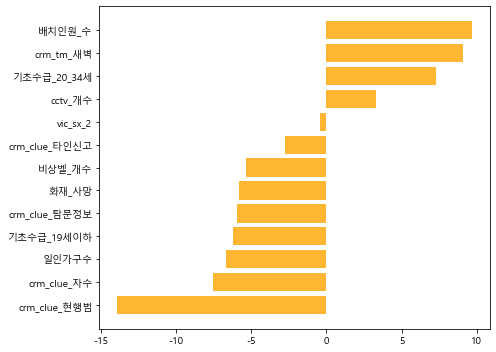

In [14]:
plot_coef(X_train.columns, np.ravel(ridge.coef_) )
plt.savefig('../이미지/변수영향도_법질서안전도.png', dpi=200,bbox_inches='tight')

## Lasso

In [35]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.012 mae: 3.1
10 : 0.0 -0.012 mae: 3.1
1 : 0.0 -0.012 mae: 3.1
0.1 : 0.286 0.073 mae: 2.816
0.01 : 0.651 0.571 mae: 1.932
0.001 : 0.668 0.518 mae: 2.067
0.0001 : 0.668 0.507 mae: 2.09


In [36]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.43
Fold = 2, mae = 2.87
Fold = 3, mae = 2.32
Fold = 4, mae = 2.59
Fold = 5, mae = 3.09
------------------------------
Average Error: 2.6597662950776693
------------------------------
Fold = 1, mae = 1.60
Fold = 2, mae = 2.25
Fold = 3, mae = 1.92
Fold = 4, mae = 1.54
Fold = 5, mae = 2.38
------------------------------
Average Error: 1.9399328173660844
-----------------------------

## ElasticNet

In [37]:
alphas_finder(ElasticNet)

100 : 0.0 -0.012 mae: 3.1
10 : 0.0 -0.012 mae: 3.1
1 : 0.0 -0.012 mae: 3.1
0.1 : 0.24 0.164 mae: 2.72
0.01 : 0.568 0.525 mae: 1.925
0.001 : 0.663 0.556 mae: 1.973
0.0001 : 0.668 0.513 mae: 2.077


In [38]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.46
Fold = 2, mae = 2.85
Fold = 3, mae = 2.39
Fold = 4, mae = 2.62
Fold = 5, mae = 3.12
------------------------------
Average Error: 2.687112768838638
------------------------------
Fold = 1, mae = 1.56
Fold = 2, mae = 2.28
Fold = 3, mae = 1.86
Fold = 4, mae = 1.77
Fold = 5, mae = 2.51
------------------------------
Average Error: 1.9952443691390704
------------------------------

## XGboost

In [39]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999564311066 0.3036318337580656 2.592367058831293


In [40]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.76
Fold = 2, mae = 2.36
Fold = 3, mae = 2.37
Fold = 4, mae = 2.04
Fold = 5, mae = 2.72
------------------------------
Average Error: 2.4507026252746575
------------------------------


In [41]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999814131822 -0.049638450149519064 3.0708950558224233


In [42]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 3.34
Fold = 2, mae = 3.17
Fold = 3, mae = 2.52
Fold = 4, mae = 2.72
Fold = 5, mae = 3.39
------------------------------
Average Error: 3.026042184956868
------------------------------


## lightgbm

In [43]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.7590208897758137 0.30050186490859865 2.4912259720801555


In [44]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 1.78
Fold = 2, mae = 2.53
Fold = 3, mae = 2.19
Fold = 4, mae = 2.11
Fold = 5, mae = 2.78
------------------------------
Average Error: 2.277906426946985
------------------------------


In [45]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.29855579315606195
테스트 결과 :  0.23063023004847993
테스트 결과 :  2.601823161860471


In [46]:
mae_kfold(svr)

Fold = 1, mae = 2.20
Fold = 2, mae = 2.71
Fold = 3, mae = 2.25
Fold = 4, mae = 2.34
Fold = 5, mae = 2.90
------------------------------
Average Error: 2.4835873518847196
------------------------------


# standardscaling

#### 변수마다 Standard Scaling

- scaling하니까 안좋음

In [49]:
#각 변수들을 스케일링 하는 함수

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
        
    return df

In [50]:
df.iloc[:,:-1].columns

Index(['crm_clue_자수', 'crm_clue_타인신고', 'crm_clue_현행범', 'crm_clue_탐문정보',
       'vic_sx_2', '기초수급_19세이하', '기초수급_20_34세', 'crm_tm_새벽', '화재_사망',
       'cctv_개수', '배치인원_수', '비상벨_개수', '일인가구수'],
      dtype='object')

In [51]:
standard_scaling(df, df.iloc[:,:-1].columns)

,crm_clue_자수,crm_clue_타인신고,crm_clue_현행범,crm_clue_탐문정보,vic_sx_2,기초수급_19세이하,기초수급_20_34세,crm_tm_새벽,화재_사망,cctv_개수,배치인원_수,비상벨_개수,일인가구수,score_법질서
0,1.588471,3.590648,0.966474,2.472521,1.638500,0.422364,-0.145025,2.636431,0.204862,1.606895,0.749224,-0.909420,0.703653,67.60
1,0.389307,0.979048,0.117623,0.488051,0.295304,0.422364,-0.145025,0.598180,-0.261768,0.310941,-0.485270,-0.918843,-0.559382,64.90
2,1.997277,1.064116,1.226231,1.232227,1.304057,0.422364,-0.145025,0.875885,-0.728398,1.411062,0.190548,-0.902353,0.093248,66.10
3,-0.346543,-0.654266,-0.837915,0.711304,-0.715257,1.224555,0.181250,-0.737948,0.204862,-0.913735,-1.143066,-0.895286,-1.000262,64.65
4,0.362054,-0.322499,-1.338876,0.463245,-0.950271,1.224555,0.181250,-0.963256,-0.728398,-1.133327,-1.530535,-0.892930,-0.929592,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.537319,-1.096622,-1.065203,-1.000302,-1.286522,0.029093,0.321493,-1.162366,-0.728398,-0.455112,-1.224164,0.254327,-0.783554,69.75
119,-0.401051,0.434610,0.637138,-0.553796,-0.098797,0.797546,0.891966,0.231400,-0.261768,1.426901,0.848344,3.267347,0.671554,66.30
120,-0.646334,-0.603225,-0.480748,-0.876273,-0.735143,-1.217180,-1.274269,-0.769387,0.671492,-0.665344,-0.683510,-0.122595,-1.082101,68.15
121,-0.700842,-0.688293,-0.666289,-0.727438,-1.131051,-1.271902,-1.257141,-0.999934,1.138121,-1.226204,-0.890761,-0.822257,0.090482,66.40


# 설명력 보기위한 모델링

In [52]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_법질서"],test_size = 0.3, random_state=0)

In [53]:
X = np.array(df.drop('score_법질서', 1))
Y = np.array(df['score_법질서'])

In [54]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.6682063450277558 0.5062686879818727 2.0930289152433335


In [55]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9211979259345575
------------------------------


## ridge

In [56]:
# ridge
alphas_finder(Ridge)

100 : 0.31 0.283 mae: 2.514
10 : 0.564 0.551 mae: 1.835
1 : 0.661 0.566 mae: 1.947
0.1 : 0.668 0.515 mae: 2.072
0.01 : 0.668 0.507 mae: 2.091
0.001 : 0.668 0.506 mae: 2.093
0.0001 : 0.668 0.506 mae: 2.093


In [57]:
#best2 1.90
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 2.24
Fold = 2, mae = 2.74
Fold = 3, mae = 2.23
Fold = 4, mae = 2.39
Fold = 5, mae = 3.01
------------------------------
Average Error: 2.5239061468925525
------------------------------
Fold = 1, mae = 1.49
Fold = 2, mae = 2.32
Fold = 3, mae = 1.85
Fold = 4, mae = 1.75
Fold = 5, mae = 2.48
------------------------------
Average Error: 1.9803790572796711
------------------------------
Fold = 1, mae = 1.59
Fold = 2, mae = 2.18
Fold = 3, mae = 1.90
Fold = 4, mae = 1.50
Fold = 5, mae = 2.33
------------------------------
Average Error: 1.9027905504321452
------------------------------
Fold = 1, mae = 1.70
Fold = 2, mae = 2.17
Fold = 3, mae = 1.95
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9182021030530465
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9208742536311452
--------------------------

## Lasso

In [58]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.012 mae: 3.1
10 : 0.0 -0.012 mae: 3.1
1 : 0.165 0.006 mae: 2.987
0.1 : 0.601 0.523 mae: 1.921
0.01 : 0.667 0.534 mae: 2.029
0.001 : 0.668 0.509 mae: 2.086
0.0001 : 0.668 0.507 mae: 2.092


In [59]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.70
Fold = 2, mae = 3.07
Fold = 3, mae = 2.47
Fold = 4, mae = 2.90
Fold = 5, mae = 3.36
------------------------------
Average Error: 2.900720674610713
------------------------------
Fold = 1, mae = 1.53
Fold = 2, mae = 2.41
Fold = 3, mae = 1.90
Fold = 4, mae = 1.63
Fold = 5, mae = 2.55
------------------------------
Average Error: 2.0014347100844696
------------------------------
Fold = 1, mae = 1.67
Fold = 2, mae = 2.19
Fold = 3, mae = 1.94
Fold = 4, mae = 1.49
Fold = 5, mae = 2.31
------------------------------
Average Error: 1.9189703670474298
-----------------------------

## ElasticNet

In [60]:
alphas_finder(ElasticNet)

100 : 0.0 -0.012 mae: 3.1
10 : 0.0 -0.012 mae: 3.1
1 : 0.239 0.141 mae: 2.759
0.1 : 0.583 0.546 mae: 1.86
0.01 : 0.665 0.55 mae: 1.989
0.001 : 0.668 0.512 mae: 2.08
0.0001 : 0.668 0.507 mae: 2.092


In [61]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.48
Fold = 2, mae = 2.89
Fold = 3, mae = 2.38
Fold = 4, mae = 2.67
Fold = 5, mae = 3.15
------------------------------
Average Error: 2.7143134304716416
------------------------------
Fold = 1, mae = 1.51
Fold = 2, mae = 2.35
Fold = 3, mae = 1.88
Fold = 4, mae = 1.70
Fold = 5, mae = 2.53
------------------------------
Average Error: 1.9944488611922189
------------------------------
Fold = 1, mae = 1.63
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 1.49
Fold = 5, mae = 2.32
------------------------------
Average Error: 1.909347464304254
-----------------------------

## XGboost

In [62]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999564311066 0.3106270836477609 2.5815982715503596


In [63]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.76
Fold = 2, mae = 2.39
Fold = 3, mae = 2.37
Fold = 4, mae = 2.04
Fold = 5, mae = 2.72
------------------------------
Average Error: 2.4566953849792474
------------------------------


In [64]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999814131822 -0.049638450149519064 3.0708950558224233


In [65]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 3.34
Fold = 2, mae = 3.13
Fold = 3, mae = 2.52
Fold = 4, mae = 2.66
Fold = 5, mae = 3.37
------------------------------
Average Error: 3.003727976226806
------------------------------


## lightgbm

In [66]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.7628056102558721 0.23951369063753614 2.659204119778207


In [67]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 1.97
Fold = 2, mae = 2.59
Fold = 3, mae = 2.19
Fold = 4, mae = 1.97
Fold = 5, mae = 2.97
------------------------------
Average Error: 2.3383179040411206
------------------------------


In [68]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.592389418542731
테스트 결과 :  0.5248423243707472
테스트 결과 :  2.1337020827034405


In [69]:
mae_kfold(svr)

Fold = 1, mae = 1.52
Fold = 2, mae = 2.13
Fold = 3, mae = 2.02
Fold = 4, mae = 1.92
Fold = 5, mae = 2.24
------------------------------
Average Error: 1.9675863379092065
------------------------------


# RobustScaler

### 각변수 robustscaling



In [72]:
#각 변수들을 스케일링 하는 함수

def robust_scaling(df, scale_columns):
    for col in scale_columns:
        series_med = df[col].median()
        series_per75 = np.percentile(df[col],75)
        series_per25 = np.percentile(df[col],25)
        df[col] = df[col].apply(lambda x: (x-series_med)/(series_per75-series_per25))
        
            
    return df

In [73]:
df.iloc[:,:-1].columns

Index(['crm_clue_자수', 'crm_clue_타인신고', 'crm_clue_현행범', 'crm_clue_탐문정보',
       'vic_sx_2', '기초수급_19세이하', '기초수급_20_34세', 'crm_tm_새벽', '화재_사망',
       'cctv_개수', '배치인원_수', '비상벨_개수', '일인가구수'],
      dtype='object')

In [74]:
robust_scaling(df, df.iloc[:,:-1].columns)

,crm_clue_자수,crm_clue_타인신고,crm_clue_현행범,crm_clue_탐문정보,vic_sx_2,기초수급_19세이하,기초수급_20_34세,crm_tm_새벽,화재_사망,cctv_개수,배치인원_수,비상벨_개수,일인가구수,score_법질서
0,2.303030,2.791139,0.701262,2.539326,1.274510,0.558545,0.000000,2.026119,0.5,1.538757,0.412088,-0.349135,0.664721,67.60
1,0.969697,0.848101,0.187938,0.741573,0.303268,0.558545,0.000000,0.574627,0.0,0.385650,-0.340659,-0.355154,-0.405297,64.90
2,2.757576,0.911392,0.858345,1.415730,1.032680,0.558545,0.000000,0.772388,-0.5,1.364510,0.071429,-0.344620,0.147598,66.10
3,0.151515,-0.367089,-0.389902,0.943820,-0.427451,1.192499,0.227611,-0.376866,0.5,-0.704036,-0.741758,-0.340105,-0.778802,64.65
4,0.939394,-0.120253,-0.692847,0.719101,-0.597386,1.192499,0.227611,-0.537313,-0.5,-0.899423,-0.978022,-0.338600,-0.718932,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.060606,-0.696203,-0.527349,-0.606742,-0.840523,0.247751,0.325447,-0.679104,-0.5,-0.295964,-0.791209,0.394281,-0.595211,69.75
119,0.090909,0.443038,0.502104,-0.202247,0.018301,0.855043,0.723412,0.313433,0.0,1.378603,0.472527,2.319037,0.637527,66.30
120,-0.181818,-0.329114,-0.173913,-0.494382,-0.441830,-0.737151,-0.787768,-0.399254,1.0,-0.483024,-0.461538,0.153499,-0.848135,68.15
121,-0.242424,-0.392405,-0.286115,-0.359551,-0.728105,-0.780397,-0.775819,-0.563433,1.5,-0.982063,-0.587912,-0.293454,0.145254,66.40


# 설명력 보기위한 모델링

In [75]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_법질서"],test_size = 0.3, random_state=0)

In [76]:
X = np.array(df.drop('score_법질서', 1))
Y = np.array(df['score_법질서'])

In [77]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.668206345027756 0.5062686879818721 2.093028915243336


In [78]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9211979259345582
------------------------------


## ridge

In [79]:
# ridge
alphas_finder(Ridge)

100 : 0.291 0.227 mae: 2.618
10 : 0.499 0.457 mae: 2.021
1 : 0.644 0.591 mae: 1.864
0.1 : 0.668 0.525 mae: 2.048
0.01 : 0.668 0.508 mae: 2.088
0.001 : 0.668 0.506 mae: 2.093
0.0001 : 0.668 0.506 mae: 2.093


In [80]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 2.35
Fold = 2, mae = 2.78
Fold = 3, mae = 2.23
Fold = 4, mae = 2.48
Fold = 5, mae = 3.06
------------------------------
Average Error: 2.5785037810612073
------------------------------
Fold = 1, mae = 1.61
Fold = 2, mae = 2.51
Fold = 3, mae = 1.94
Fold = 4, mae = 1.95
Fold = 5, mae = 2.66
------------------------------
Average Error: 2.133836733449986
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.25
Fold = 3, mae = 1.88
Fold = 4, mae = 1.55
Fold = 5, mae = 2.38
------------------------------
Average Error: 1.9197573422385035
------------------------------
Fold = 1, mae = 1.68
Fold = 2, mae = 2.17
Fold = 3, mae = 1.94
Fold = 4, mae = 1.49
Fold = 5, mae = 2.30
------------------------------
Average Error: 1.9156089965584446
------------------------------
Fold = 1, mae = 1.71
Fold = 2, mae = 2.17
Fold = 3, mae = 1.96
Fold = 4, mae = 1.48
Fold = 5, mae = 2.29
------------------------------
Average Error: 1.9205899784931755
---------------------------

## Lasso

In [81]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.012 mae: 3.1
10 : 0.0 -0.012 mae: 3.1
1 : 0.179 0.001 mae: 2.986
0.1 : 0.544 0.461 mae: 1.981
0.01 : 0.666 0.545 mae: 2.003
0.001 : 0.668 0.511 mae: 2.083
0.0001 : 0.668 0.507 mae: 2.092


In [82]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.68
Fold = 2, mae = 2.99
Fold = 3, mae = 2.43
Fold = 4, mae = 2.89
Fold = 5, mae = 3.34
------------------------------
Average Error: 2.8684138529887786
------------------------------
Fold = 1, mae = 1.54
Fold = 2, mae = 2.61
Fold = 3, mae = 1.91
Fold = 4, mae = 1.79
Fold = 5, mae = 2.70
------------------------------
Average Error: 2.1099432518103773
------------------------------
Fold = 1, mae = 1.65
Fold = 2, mae = 2.20
Fold = 3, mae = 1.93
Fold = 4, mae = 1.49
Fold = 5, mae = 2.33
------------------------------
Average Error: 1.920594270780623
-----------------------------

## ElasticNet

In [83]:
alphas_finder(ElasticNet)

100 : 0.0 -0.012 mae: 3.1
10 : 0.0 -0.012 mae: 3.1
1 : 0.232 0.099 mae: 2.824
0.1 : 0.518 0.473 mae: 1.967
0.01 : 0.658 0.575 mae: 1.924
0.001 : 0.668 0.517 mae: 2.068
0.0001 : 0.668 0.507 mae: 2.09


In [84]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.93
Fold = 2, mae = 3.00
Fold = 3, mae = 2.72
Fold = 4, mae = 3.11
Fold = 5, mae = 3.53
------------------------------
Average Error: 3.059333137497424
------------------------------
Fold = 1, mae = 2.52
Fold = 2, mae = 2.89
Fold = 3, mae = 2.35
Fold = 4, mae = 2.68
Fold = 5, mae = 3.17
------------------------------
Average Error: 2.7216909786768033
------------------------------
Fold = 1, mae = 1.59
Fold = 2, mae = 2.53
Fold = 3, mae = 1.95
Fold = 4, mae = 1.88
Fold = 5, mae = 2.67
------------------------------
Average Error: 2.1247810699757688
------------------------------
Fold = 1, mae = 1.57
Fold = 2, mae = 2.22
Fold = 3, mae = 1.89
Fold = 4, mae = 1.52
Fold = 5, mae = 2.36
------------------------------
Average Error: 1.9150551066513262
----------------------------

## XGboost

In [85]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999564311066 0.3036318337580656 2.592367058831293


In [86]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 2.76
Fold = 2, mae = 2.36
Fold = 3, mae = 2.37
Fold = 4, mae = 2.04
Fold = 5, mae = 2.72
------------------------------
Average Error: 2.45074628829956
------------------------------


In [87]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999814131822 -0.049638450149519064 3.0708950558224233


In [88]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 3.34
Fold = 2, mae = 3.13
Fold = 3, mae = 2.52
Fold = 4, mae = 2.66
Fold = 5, mae = 3.39
------------------------------
Average Error: 3.0063996465047196
------------------------------


## lightgbm

In [89]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.7682866629415638 0.2813322833528027 2.5420872168526754


In [90]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 1.90
Fold = 2, mae = 2.43
Fold = 3, mae = 2.14
Fold = 4, mae = 2.02
Fold = 5, mae = 2.75
------------------------------
Average Error: 2.245712536903434
------------------------------


In [91]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.5739504124237272
테스트 결과 :  0.6187279127023337
테스트 결과 :  1.8430720321925251


In [92]:
mae_kfold(svr)

Fold = 1, mae = 1.46
Fold = 2, mae = 2.23
Fold = 3, mae = 1.92
Fold = 4, mae = 1.92
Fold = 5, mae = 2.28
------------------------------
Average Error: 1.9629255050160377
------------------------------
